# Indian Trade Data regression
By : Hesham Asem

____

so we have here 2 data files , for import & export for a specific indian company , between 2010 & 2018

lets use them to build a regression model , so we can expect the value using other features . 

data file : 
https://www.kaggle.com/lakshyaag/india-trade-data#2018-2010_export.csv

_____

first to import the libraries 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
sns.set(style="darkgrid")

then to read the data

In [2]:
idata = pd.read_csv('2018-2010_import.csv') 
edata = pd.read_csv('2018-2010_export.csv') 

since we have 2 files , we'll need to handle them separately 

____

# Needed Functions . 

as usual , we'll build here important funcstion which will be helpful in data processing . 

and you can see that some functions have the arg (data) , since we'll have to repeat our steps on idata & edata

In [3]:
def max_counts( feature , number, data, return_rest = False ) : 
    counts = data[feature].value_counts()
    values_list = list(counts[:number].values)
    rest_value =  sum(counts.values) - sum (values_list)
    index_list = list(counts[:number].index)
    
    if return_rest : 
        values_list.append(rest_value )
        index_list.append('rest items')
    
    result = pd.Series(values_list, index=index_list)
    if len(data[feature]) <= number : 
        result = None
    return result

In [4]:
def series_pie(series) : 
    plt.pie(series.values,labels=list(series.index),autopct ='%1.2f%%',labeldistance = 1.1,explode = [0.05 for i in range(len(series.values))] )
    plt.show()

In [5]:
def series_bar(series) : 
    plt.bar(list(series.index),series.values )
    plt.show()

In [6]:
def make_label_encoder(original_feature , new_feature,data) : 
    enc  = LabelEncoder()
    enc.fit(data[original_feature])
    data[new_feature] = enc.transform(data[original_feature])
    data.drop([original_feature],axis=1, inplace=True)

_____

# Import Data

let's have a look to import data

In [7]:
idata.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


few features , what is the dimension ? 

In [8]:
idata.shape

(93095, 5)

so we'll need to start in data processing

_____

# Data Processing


let's start with HSCode feature , how many unique values in it

In [9]:
len(idata['HSCode'].unique())

98

let's have a look to top values for it

In [10]:
idata['HSCode'].value_counts()[:10]

85    2174
84    2090
39    1866
99    1836
72    1826
90    1739
76    1729
73    1619
74    1518
40    1472
Name: HSCode, dtype: int64

______

so it looks that this feature is very correlated to the other feature Commodity . 

so how many are them 

In [11]:
len(idata['HSCode'].unique())

98

& how many unqiue values for Commodity ? 

In [12]:
len(idata['Commodity'].unique())

98

cool , lets get the Commodity data , for only specific HSCode value

In [13]:
new_data = idata[idata['HSCode']==5]['Commodity']
new_data

0        PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...
217      PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...
308      PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...
505      PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...
638      PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...
922      PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...
1196     PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...
1392     PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...
2348     PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...
2360     PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...
2542     PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...
2892     PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...
3088     PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...
3434     PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...
3556     PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...
3746     PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...
4375     PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI.

what are the unique values for it ? 

In [14]:
new_data.unique()

array(['PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED.'],
      dtype=object)

and to be more sure , we'll mak for block for HSCode values , to get unique values for Commodity data 

In [15]:
for x in range(idata['HSCode'].max()): 
    new_data = idata[idata['HSCode']==x]['Commodity']
    print(len(new_data.unique()))
    print('---------------')

0
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
---------------
1
--------

so it's clear that those two features are very correlated , so we can drop one of them , let's drop commodity

In [16]:
idata.drop(['Commodity'],axis=1, inplace=True)

_____

how data looks like now ? 

In [17]:
idata.head()

,HSCode,value,country,year
0,5,0.00,AFGHANISTAN TIS,2018
1,7,12.38,AFGHANISTAN TIS,2018
2,8,268.60,AFGHANISTAN TIS,2018
3,9,35.48,AFGHANISTAN TIS,2018
4,11,NaN,AFGHANISTAN TIS,2018


let's work with country feature

In [18]:
idata['country'].unique()

array(['AFGHANISTAN TIS', 'ALBANIA', 'ALGERIA', 'AMERI SAMOA', 'ANDORRA',
       'ANGOLA', 'ANGUILLA', 'ANTARTICA', 'ANTIGUA', 'ARGENTINA',
       'ARMENIA', 'ARUBA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN',
       'BAHAMAS', 'BAHARAIN IS', 'BANGLADESH PR', 'BARBADOS', 'BELARUS',
       'BELGIUM', 'BELIZE', 'BENIN', 'BERMUDA', 'BHUTAN', 'BOLIVIA',
       'BOSNIA-HRZGOVIN', 'BOTSWANA', 'BR VIRGN IS', 'BRAZIL', 'BRUNEI',
       'BULGARIA', 'BURKINA FASO', 'BURUNDI', 'C AFRI REP', 'CAMBODIA',
       'CAMEROON', 'CANADA', 'CAPE VERDE IS', 'CAYMAN IS', 'CHAD',
       'CHILE', 'CHINA P RP', 'CHRISTMAS IS.', 'COCOS IS', 'COLOMBIA',
       'COMOROS', 'CONGO D. REP.', 'CONGO P REP', 'COOK IS', 'COSTA RICA',
       "COTE D' IVOIRE", 'CROATIA', 'CUBA', 'CYPRUS', 'CZECH REPUBLIC',
       'DENMARK', 'DJIBOUTI', 'DOMINIC REP', 'DOMINICA', 'ECUADOR',
       'EGYPT A RP', 'EL SALVADOR', 'EQUTL GUINEA', 'ERITREA', 'ESTONIA',
       'ETHIOPIA', 'FAROE IS.', 'FIJI IS', 'FINLAND', 'FR GUIANA',
       'FR POL

how many country we have here 

In [19]:
len(idata['country'].unique())

242

what are the most repeated countries 

In [20]:
counts = idata['country'].value_counts()

In [21]:
counts[:10]

BELGIUM       1143
AUSTRALIA     1095
U S A         1075
ITALY         1069
GERMANY       1069
CHINA P RP    1064
U K           1063
FRANCE        1060
SINGAPORE     1051
THAILAND      1050
Name: country, dtype: int64

so we'll need to get the max countries to graph them , let's say we'll get max 8 countries

In [22]:
max_countries = max_counts('country',8,idata)

In [23]:
max_countries

BELGIUM       1143
AUSTRALIA     1095
U S A         1075
ITALY         1069
GERMANY       1069
CHINA P RP    1064
U K           1063
FRANCE        1060
dtype: int64

____

let's pie chart it

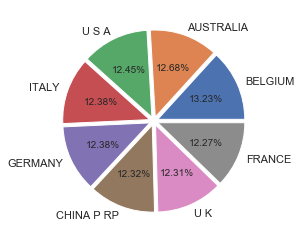

In [24]:
series_pie(max_countries)

also we can bar them 

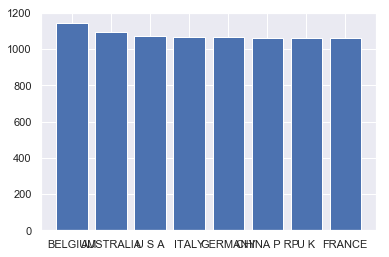

In [25]:
series_bar(max_countries)

so we can apply labelencoder to them

In [26]:
make_label_encoder('country','country_code',idata)

_____

now how data looks like 

In [27]:
idata.head()

,HSCode,value,year,country_code
0,5,0.00,2018,0
1,7,12.38,2018,0
2,8,268.60,2018,0
3,9,35.48,2018,0
4,11,NaN,2018,0


we ned to check if we have any nulls

In [28]:
idata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93095 entries, 0 to 93094
Data columns (total 4 columns):
HSCode          93095 non-null int64
value           79068 non-null float64
year            93095 non-null int64
country_code    93095 non-null int32
dtypes: float64(1), int32(1), int64(2)
memory usage: 2.5 MB


so value feature got more than 14K null value , & we cannot fill them with mean or median , since this is the output , so it will mislead the training , we'll have to drop all these rows with any value less than or equal 0

In [29]:
new_data  = idata[idata['value'] > 0]

now how fata looks like 

In [30]:
new_data.shape

(68614, 4)

In [31]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68614 entries, 1 to 93090
Data columns (total 4 columns):
HSCode          68614 non-null int64
value           68614 non-null float64
year            68614 non-null int64
country_code    68614 non-null int32
dtypes: float64(1), int32(1), int64(2)
memory usage: 2.4 MB


cool , now we ready for training

________




_____



# Building the Model


let's first define X & y

In [32]:
X = new_data.drop(['value'], axis=1, inplace=False)
y = new_data['value']

what are the dimensions ? 

In [33]:
X.shape

(68614, 3)

In [34]:
y.shape

(68614,)

split it

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (54891, 3)
X_test shape is  (13723, 3)
y_train shape is  (54891,)
y_test shape is  (13723,)


_____

let's  use Gradient Boosting Regressor , with 1000 estimators & 10 depth & 0.1 learning rate

In [36]:
GBRModel = GradientBoostingRegressor(n_estimators=1000,max_depth=10,learning_rate = 0.1 ,random_state=33)
GBRModel.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=33, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

now how is accuracy ? 

In [37]:
print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test))

GBRModel Train Score is :  0.9999860298382643
GBRModel Test Score is :  0.9543294928842732


great work , & even we avoided OF , since test accuracy is high , now let's make prediction 

In [38]:
y_pred = GBRModel.predict(X_test)
print('Predicted Value for GBRModel is : ' , y_pred[:10])

Predicted Value for GBRModel is :  [ 0.34157409  3.32058755  0.36913974  7.24597004 10.10562048  1.48526775
  4.13261347 73.38731982  4.18547747  3.16427755]


______

______

# Export Data


now , we'll have to repeat almost all steps to export data , instead of import data

In [39]:
len(edata['HSCode'].unique())

98

In [40]:
edata['HSCode'].value_counts()[:10]

85    1963
84    1945
90    1917
30    1916
62    1907
73    1880
39    1872
87    1866
63    1865
99    1856
Name: HSCode, dtype: int64

In [41]:
len(edata['HSCode'].value_counts())

98

In [42]:
edata.drop(['Commodity'],axis=1, inplace=True)

In [43]:
edata.head()

,HSCode,value,country,year
0,2,0.18,AFGHANISTAN TIS,2018
1,3,0.00,AFGHANISTAN TIS,2018
2,4,12.48,AFGHANISTAN TIS,2018
3,6,0.00,AFGHANISTAN TIS,2018
4,7,1.89,AFGHANISTAN TIS,2018


In [44]:
edata['country'].unique()

array(['AFGHANISTAN TIS', 'ALBANIA', 'ALGERIA', 'AMERI SAMOA', 'ANDORRA',
       'ANGOLA', 'ANGUILLA', 'ANTARTICA', 'ANTIGUA', 'ARGENTINA',
       'ARMENIA', 'ARUBA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN',
       'BAHAMAS', 'BAHARAIN IS', 'BANGLADESH PR', 'BARBADOS', 'BELARUS',
       'BELGIUM', 'BELIZE', 'BENIN', 'BERMUDA', 'BHUTAN', 'BOLIVIA',
       'BOSNIA-HRZGOVIN', 'BOTSWANA', 'BR VIRGN IS', 'BRAZIL', 'BRUNEI',
       'BULGARIA', 'BURKINA FASO', 'BURUNDI', 'C AFRI REP', 'CAMBODIA',
       'CAMEROON', 'CANADA', 'CAPE VERDE IS', 'CAYMAN IS', 'CHAD',
       'CHILE', 'CHINA P RP', 'COLOMBIA', 'COMOROS', 'CONGO D. REP.',
       'CONGO P REP', 'COOK IS', 'COSTA RICA', "COTE D' IVOIRE",
       'CROATIA', 'CUBA', 'CURACAO', 'CYPRUS', 'CZECH REPUBLIC',
       'DENMARK', 'DJIBOUTI', 'DOMINIC REP', 'DOMINICA', 'ECUADOR',
       'EGYPT A RP', 'EL SALVADOR', 'EQUTL GUINEA', 'ERITREA', 'ESTONIA',
       'ETHIOPIA', 'FALKLAND IS', 'FAROE IS.', 'FIJI IS', 'FINLAND',
       'FR GUIANA', 'FR POLYNE

In [45]:
len(edata['country'].unique())

248

In [46]:
counts = edata['country'].value_counts()

In [47]:
counts[:10]

U ARAB EMTS      882
GERMANY          881
NEPAL            881
U S A            881
U K              880
SRI LANKA DSR    880
MALAYSIA         880
SINGAPORE        879
CHINA P RP       877
SAUDI ARAB       877
Name: country, dtype: int64

In [48]:
list(counts[:10].index)

['U ARAB EMTS',
 'GERMANY',
 'NEPAL',
 'U S A',
 'U K',
 'SRI LANKA DSR',
 'MALAYSIA',
 'SINGAPORE',
 'CHINA P RP',
 'SAUDI ARAB']

In [49]:
max_countries = max_counts('country',8,edata)
max_countries

U ARAB EMTS      882
GERMANY          881
NEPAL            881
U S A            881
U K              880
SRI LANKA DSR    880
MALAYSIA         880
SINGAPORE        879
dtype: int64

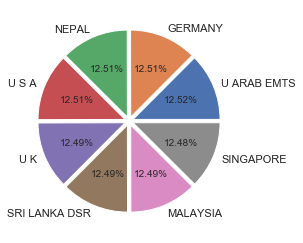

In [50]:
series_pie(max_countries)

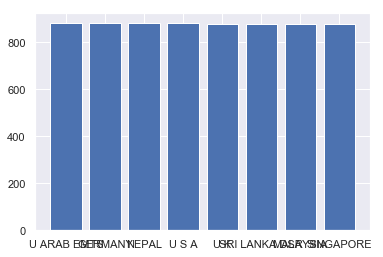

In [51]:
series_bar(max_countries)

In [52]:
make_label_encoder('country','country_code',edata)

In [53]:
edata.head()

,HSCode,value,year,country_code
0,2,0.18,2018,0
1,3,0.00,2018,0
2,4,12.48,2018,0
3,6,0.00,2018,0
4,7,1.89,2018,0


In [54]:
edata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 4 columns):
HSCode          137023 non-null int64
value           122985 non-null float64
year            137023 non-null int64
country_code    137023 non-null int32
dtypes: float64(1), int32(1), int64(2)
memory usage: 3.7 MB


In [55]:
new_data  = edata[edata['value'] > 0]

In [56]:
new_data.shape

(107125, 4)

In [57]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107125 entries, 0 to 137022
Data columns (total 4 columns):
HSCode          107125 non-null int64
value           107125 non-null float64
year            107125 non-null int64
country_code    107125 non-null int32
dtypes: float64(1), int32(1), int64(2)
memory usage: 3.7 MB


In [58]:
X = new_data.drop(['value'], axis=1, inplace=False)
y = new_data['value']

In [59]:
X.shape

(107125, 3)

In [60]:
y.shape

(107125,)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (71773, 3)
X_test shape is  (35352, 3)
y_train shape is  (71773,)
y_test shape is  (35352,)


In [62]:
GBRModel = GradientBoostingRegressor(n_estimators=1000,max_depth=10,learning_rate = 0.1 ,random_state=33)
GBRModel.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=33, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test))

GBRModel Train Score is :  0.999904323051611
GBRModel Test Score is :  0.8759112739396501


In [64]:
y_pred = GBRModel.predict(X_test)
print('Predicted Value for GBRModel is : ' , y_pred[:10])

Predicted Value for GBRModel is :  [ 8.98851412e-01  1.05280708e-01  2.74401935e+02 -1.50152711e+00
 -2.05510117e-01  1.84992732e+01  2.75233371e+00  6.96702888e+00
  7.12756241e+00  3.92428165e+00]
